<a href="https://colab.research.google.com/github/minhvvan/DeepLearning/blob/main/kerasBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(np.bincount(y_train))
print(np.bincount(y_val))

x_train = x_train / 255
x_val = x_val /255

x_train = x_train.reshape(-1,784)
x_val = x_val.reshape(-1,784)


y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

print(y_train[0], y_train_encoded[0])


4423680/4422102 [==============================] - 0s 0us/step
[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
[1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
#훈련할 가중치 변수 선언
w = tf.Variable(tf.zeros(shape=(1)))
b = tf.Variable(tf.zeros(shape=(1)))

#경사 하강법 옵티마이저 설정
optimizer = tf.optimizers.SGD(lr = 0.05)

#에포크만큼 훈련
num_epochs = 10
for step in range(num_epochs):
  #미분 연산 과정 기록
  with tf.GradientTape() as tape:
    z_net = w * x_train + b
    z_net = tf.reshape(z_net, [-1])
    sqr_errors = tf.square(y_train - z_net)
    mean_cost = tf.reduce_mean(sqr_errors)
    #손설 함수 가중치 그레이디언트 계산
    grads = tape.gradient(mean_cost, [w, b])
    #옵티마이저 그레이디언트 계산
    optimizer.apply_gradients(zip(grads, [w, b]))

(10920,)
(10920,)
(10920,)
(10920,)
(10920,)
(10920,)
(10920,)
(10920,)
(10920,)
(10920,)


In [8]:
#모델 생성
model = tf.keras.models.Sequential()
#완전 연결층 추가
model.add(tf.keras.layers.Dense(1))
#옵티마이저와 손실함수 지정
model.compile(optimizer='sgd', loss='mse')
#훈련
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 1ms/step - loss: nan    
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: nan
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/10
12/12 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/10
12/12 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/10
12/12 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/10
12/12 [==============================] - 0s 1ms/step - loss: nan


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#모델 생성
model = Sequential()

#은닉층과 출력층 추가
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

#최적화 알고리즘과 손실 함수 지정
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#훈련
history = model.fit(x_train, y_train_encoded, epochs=40, validation_data=(x_val, y_val_encoded))

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7345 - accuracy: 0.5244 - val_loss: 0.9653 - val_accuracy: 0.7267
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8985 - accuracy: 0.7316 - val_loss: 0.7561 - val_accuracy: 0.7553
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7379 - accuracy: 0.7565 - val_loss: 0.6719 - val_accuracy: 0.7738
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6675 - accuracy: 0.7717 - val_loss: 0.6167 - val_accuracy: 0.7897
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6221 - accuracy: 0.7855 - val_loss: 0.5808 - val_accuracy: 0.8002
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5863 - accuracy: 0.7985 - val_loss: 0.5534 - val_accuracy: 0.8110
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5566 - accuracy: 0.8094 - val_loss: 0.5333 - val_accuracy:

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


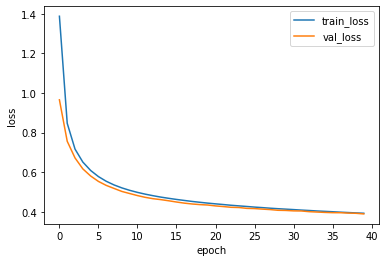

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

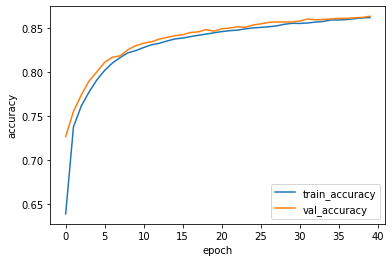

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [14]:
loss, acccuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(acccuracy)

0.8631666898727417
